# 🛸 mRo Quad Zero FSM Simulation with Live Graph
This notebook simulates an autonomous drone navigating a maze with basic sensor emulation, FSM logic, and a live plot of drift using matplotlib.

In [5]:
# Install required packages (only if not already installed)
# !pip install matplotlib dronekit pymavlink

In [6]:
import time
import random
from enum import Enum
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

class State(Enum):
    START = 'Start'
    FORWARD_SCAN = 'Forward Scan'
    SIDESTEP = 'Sidestep Right'
    DRIFT_HOLD = 'Drift Hold'
    GOAL_FOUND = 'Goal Found'
    LAND = 'Land'

class MockSensors:
    def __init__(self):
        self.distance_to_wall = 100
        self.drift = 0
        self.goal_detected = False
        self.optical_glare = False

    def update(self):
        self.distance_to_wall = random.randint(10, 100)
        self.drift = random.randint(0, 20)
        self.goal_detected = random.choice([False]*9 + [True])
        self.optical_glare = random.choice([False]*8 + [True])

class DroneFSM:
    def __init__(self):
        self.state = State.START
        self.sensors = MockSensors()
        self.log = []

    def step(self):
        self.sensors.update()
        cur = self.state
        if self.state == State.START:
            self.state = State.FORWARD_SCAN
        elif self.state == State.FORWARD_SCAN:
            if self.sensors.optical_glare or self.sensors.drift > 15:
                self.state = State.DRIFT_HOLD
            elif self.sensors.distance_to_wall < 20:
                self.state = State.SIDESTEP
            elif self.sensors.goal_detected:
                self.state = State.GOAL_FOUND
        elif self.state == State.SIDESTEP or self.state == State.DRIFT_HOLD:
            self.state = State.FORWARD_SCAN
        elif self.state == State.GOAL_FOUND:
            self.state = State.LAND
        self.log.append((time.time(), self.state.name, self.sensors.drift))
        return self.state != State.LAND

State: FORWARD_SCAN, Drift: 6 cm


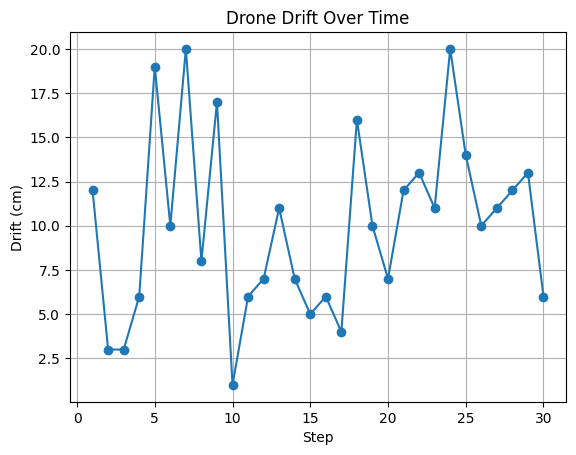

In [7]:
# Run and visualize FSM with drift plot
fsm = DroneFSM()
drift_vals = []
time_vals = []

for _ in range(30):
    if not fsm.step():
        break
    clear_output(wait=True)
    timestamp, state, drift = fsm.log[-1]
    print(f"State: {state}, Drift: {drift} cm")
    drift_vals.append(drift)
    time_vals.append(len(drift_vals))
    plt.plot(time_vals, drift_vals, marker='o')
    plt.title('Drone Drift Over Time')
    plt.xlabel('Step')
    plt.ylabel('Drift (cm)')
    plt.grid(True)
    plt.show()
    time.sleep(0.5)